# CMPINF-0010 Final Project (The Foodies)

## Introduction - The Metric

We have decided that the neighborhood with the best food is the best neighborhood in Pittsburgh. I am going to determine how many grow gardens are in each neighborhood, and use that data to determine what I believe to be the best neighborhood in Pittsburgh. 

## My Sub-metric: Grow gardens per neighborhood

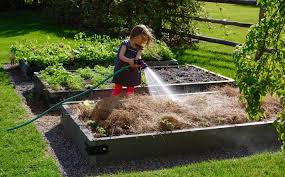

## Goal of my analysis 

My submetric is how many grow gardens are in each neighborhood. More gardens in a neighborhood correlates to a better Pittsburgh neighborhood, and my group will use this, and their two metrics in order to find the true best neighborhood in Pittsburgh. 

## My Dataset

I will begin my exploration by loading in the dataset and viewing a few of the rows. 

In [19]:
import pandas as pd 
import geopandas as gpd

data = pd.read_csv('data/GrowGardenData.csv')
data.head(4)

,urban_grower,grower_id,category,url,street_address,city,state,zip_code,country,latitude,longitude
0,Angora Gardens,584,sustainability-fund-site|other,https://www.growpittsburgh.org/directory/garde...,3 Muse Lane,White Oak,Pennsylvania,15131.0,US,40.404686,-79.862095
1,Everybody's Garden,586,sustainability-fund-site|other,https://www.growpittsburgh.org/directory/garde...,301 West Elizabeth Street,Pittsburgh,Pennsylvania,15207.0,US,40.406546,-79.945442
2,EvGard Extension,587,other,https://www.growpittsburgh.org/directory/garde...,NaN,Pittsburgh,Pennsylvania,15201.0,US,40.406377,-79.945559
3,Glen Hazel Communiuty Garden,588,other,https://www.growpittsburgh.org/directory/garde...,Johnston Avenue at Roselle Drive,Pittsburgh,Pennsylvania,15207.0,US,40.406040,-79.931253


For each grow garden in Pittsburgh, this dataset contains it's name, a unique ID, the type of garden, it's city, state, zip code, country, latitude, and longitude. 

## The Best Neighborhood (According to my sub-metric)

I am going to start by dropping a couple of columns from the dataset which are not useful in determining which gardens are in which neighborhood, in order to tidy up the dataset. 

In [20]:
data1 = data.drop(columns=["category","url","state","country","urban_grower",
                           "grower_id","street_address","city","zip_code"])
data1.head(4)

,latitude,longitude
0,40.404686,-79.862095
1,40.406546,-79.945442
2,40.406377,-79.945559
3,40.406040,-79.931253


The columns I have removed are category, url, state, country, urban_grower, grower_id, street_address, city, and zip_code. The only two remaining columns are latitude and longitude, which are the only two necessary in figuring out which neighborhood each garden belongs to. 

Next, I am going to load in the data of Pittsburgh neighborhoods and determine how many gardens are in each neighborhood. 

In [21]:
neighborhood_data = gpd.read_file("data/Neighborhoods/Neighborhoods_.shp")
neighborhood_data.head(3)

,objectid,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,shape_ar_1,page_numbe,plannerass,created_us,created_da,last_edite,last_edi_1,Shape__Are,Shape__Len,geometry
0,1,0.0,42,003,040500,1,420030405001,Block Group 1,G5030,S,...,7.843108e+06,15,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,7.842997e+06,11525.904546,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,2,1.0,42,003,040400,1,420030404001,Block Group 1,G5030,S,...,1.390463e+07,15,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.390469e+07,20945.562570,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,3,2.0,42,003,040200,2,420030402002,Block Group 2,G5030,S,...,5.999801e+06,15,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,5.998649e+06,18280.484515,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."


I am now going to tidy up this dataset, so it will be easier to view and determine how many grow gardens are in each neighborhood. I am going to simplify this geopandas dataset into a much simpler pandas dataset. 

In [22]:
neighborhoods = pd.DataFrame(columns = ["Neighborhood", "Geometry", "Grow_Gardens"])
neighborhoods["Neighborhood"] = neighborhood_data["hood"]
neighborhoods["Geometry"] = neighborhood_data["geometry"]
neighborhoods["Grow_Gardens"] = 0

neighborhoods.head(3)

,Neighborhood,Geometry,Grow_Gardens
0,Central Oakland,"POLYGON ((-79.95304 40.44203, -79.95302 40.442...",0
1,North Oakland,"POLYGON ((-79.95455 40.45882, -79.95427 40.458...",0
2,West Oakland,"POLYGON ((-79.96230 40.44294, -79.96220 40.442...",0


This dataset just contains each Pittsburgh neighborhood, alongside it's longitude and latitudes. It also has a column named "Grow_Gardens" which will be used to keep track of the number of grow gardens in each neighborhood. 

Now, I am going to iterate through the grow gardens data, and determine how many gardens are in each neighborhood, by updating the "Grow_Gardens" column in the dataset I have just created. 

In [25]:
# Importing the Point class in order to use longitude and latitude to determine what gardens are in what neighborhood 
from shapely.geometry import Point

for i, garden in data1.iterrows(): 
    # Begin by fixing each garden to a point 
    pt = Point(garden['longitude'],garden['latitude'])
    
    # Next, will itterate through the neighborhoods until we find the correct nieghborhood belonging to each garden 
    for j, neighborhood in neighborhoods.iterrows(): 
        # When neighborhood contains the point of the garden, increment the garden variable and move onto the next garden 
        if neighborhood['Geometry'].contains(pt): 
            neighborhoods.at[j, 'Grow_Gardens'] = neighborhood["Grow_Gardens"] + 1
            break
            
neighborhoods.head(10)

,Neighborhood,Geometry,Grow_Gardens
0,Central Oakland,"POLYGON ((-79.95304 40.44203, -79.95302 40.442...",0
1,North Oakland,"POLYGON ((-79.95455 40.45882, -79.95427 40.458...",1
2,West Oakland,"POLYGON ((-79.96230 40.44294, -79.96220 40.442...",3
3,Crawford-Roberts,"POLYGON ((-79.98275 40.44641, -79.98273 40.446...",1
4,Strip District,"POLYGON ((-79.97494 40.45629, -79.97484 40.456...",0
5,Central Business District,"POLYGON ((-79.99238 40.44484, -79.99233 40.444...",0
6,Spring Hill-City View,"POLYGON ((-79.99761 40.47460, -79.99761 40.474...",0
7,Perry South,"POLYGON ((-80.01456 40.47727, -80.01462 40.477...",1
8,Summer Hill,"POLYGON ((-80.01087 40.50097, -80.01073 40.499...",0
9,Northview Heights,"POLYGON ((-80.00327 40.48271, -80.00326 40.482...",0


Next, I am going to sort the neighborhoods, from most grow gardens to least. 

In [31]:
sorted_neighborhoods = neighborhoods.sort_values("Grow_Gardens", ascending=False)

sorted_neighborhoods.head(15)

,Neighborhood,Geometry,Grow_Gardens
33,Point Breeze,"POLYGON ((-79.89526 40.44717, -79.89517 40.447...",4
77,East Liberty,"POLYGON ((-79.91581 40.46088, -79.91580 40.460...",4
37,Garfield,"POLYGON ((-79.92961 40.46528, -79.92994 40.464...",4
2,West Oakland,"POLYGON ((-79.96230 40.44294, -79.96220 40.442...",3
18,Hazelwood,"POLYGON ((-79.95505 40.42713, -79.95498 40.427...",3
21,South Oakland,"POLYGON ((-79.95899 40.43665, -79.95887 40.436...",3
81,Middle Hill,"MULTIPOLYGON (((-79.97980 40.44761, -79.97979 ...",3
43,Larimer,"POLYGON ((-79.91243 40.45405, -79.91243 40.454...",3
12,Central Lawrenceville,"POLYGON ((-79.95393 40.47731, -79.95381 40.477...",3
24,Squirrel Hill South,"POLYGON ((-79.94475 40.44101, -79.94405 40.440...",2


After viewing the data, I learned that just 33 neighorhoods in Pittsburgh have at least 1 grow garden, so I am going to put those 33 on a plot. 

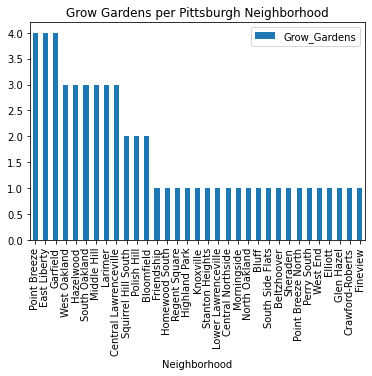

In [34]:
plot = sorted_neighborhoods.iloc[:33].plot(kind='bar', x="Neighborhood", y="Grow_Gardens",
                                           title="Grow Gardens per Pittsburgh Neighborhood")

## Results

From looking at the plot, Point Breeze, East Liberty, and Garfield are the only Pittsburgh neighborhoods with 4 grow gardens. 

Those three neighborhoods are followed by West Oakland, Hazelwood, South Oakland, Middle Hill, Larimer, and Central Lawrenceville, which all have 3 grow gardens. 

Squirrel Hill South, Polish Hill, and Bloomfield all have two grow gardens, and then there ae a number of Pittsburgh neighborhoods that have one garden contained in their neighborhood. 

## Conclusion 

To summarize, according to my submetric, either Point Breeze, East Liberty, or Garfield is the best neighborhood in Pittsburgh, because they have the most grow gardens. 